# Kaggle challenge link
https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile

In [4]:
#unzipping file
with ZipFile('train.csv.zip', 'r') as f:
    f.extractall()

# Data Preprocessing

## Setup of data and only using 100_000 rows

In [5]:
#making train and test sets from the csv file
train = pd.read_csv("train.csv", nrows = 100_000)
test = pd.read_csv('test.csv')

VarNames = ['key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']

In [6]:
VarNames

['key',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [7]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [9]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## Splitting data into train and test sets

In [10]:
#making prediction set
train_Y = np.array(train['fare_amount'])
key = test['key']

#dropping these in order to pull out the pickup/dropoff columns and place
# in a new dataframe called df_1
train = train.drop(['key','pickup_datetime','fare_amount'],axis = 1)
test = test.drop(['key'],axis = 1)

df_1 = pd.concat([train,test])
df_1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime
0,-73.844311,40.721319,-73.841610,40.712278,1,NaN
1,-74.016048,40.711303,-73.979268,40.782004,1,NaN
2,-73.982738,40.761270,-73.991242,40.750562,2,NaN
3,-73.987130,40.733143,-73.991567,40.758092,1,NaN
4,-73.968095,40.768008,-73.956655,40.783762,1,NaN


## Making mean latitude and longitude for pickup and dropoffs

In [11]:
#finding difference of long/lat's in order to observe passenger movement
train['d_latitude'] = (train['dropoff_latitude'] -
                       train['pickup_latitude']).abs()
train['d_longitude'] = (train['dropoff_longitude'] -
                       train['pickup_longitude']).abs()

test['d_latitude'] = (test['dropoff_latitude'] -
                       test['pickup_latitude']).abs()
test['d_longitude'] = (test['dropoff_latitude'] -
                       test['pickup_longitude']).abs()

train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,d_latitude,d_longitude
0,-73.844311,40.721319,-73.841610,40.712278,1,0.009041,0.002701
1,-74.016048,40.711303,-73.979268,40.782004,1,0.070701,0.036780
2,-73.982738,40.761270,-73.991242,40.750562,2,0.010708,0.008504
3,-73.987130,40.733143,-73.991567,40.758092,1,0.024949,0.004437
4,-73.968095,40.768008,-73.956655,40.783762,1,0.015754,0.011440


# Plots

## Histogramming each feature in the set

pickup_longitude


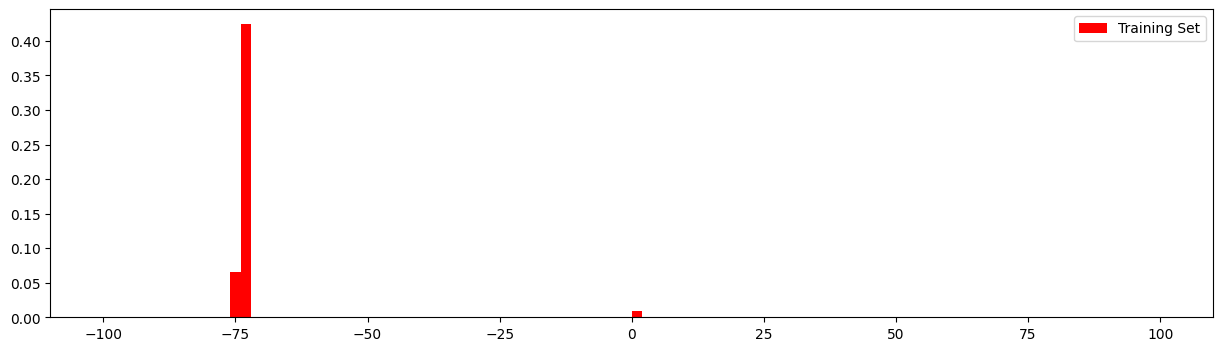

pickup_latitude


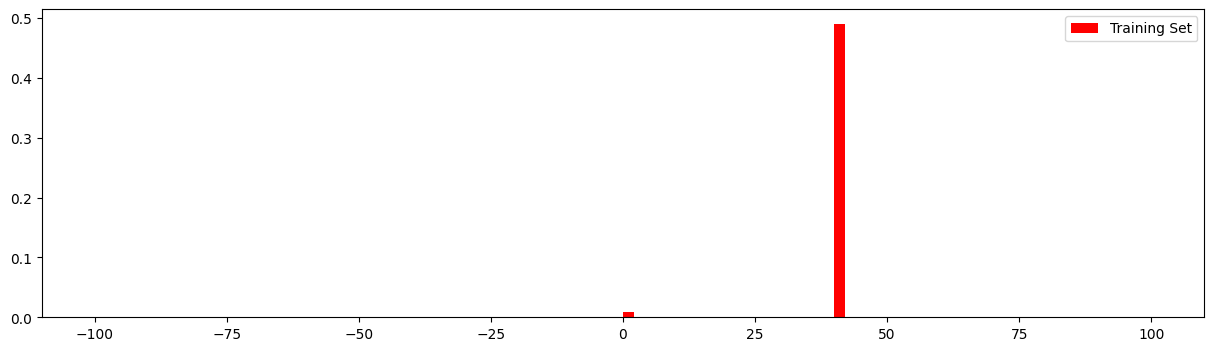

dropoff_longitude


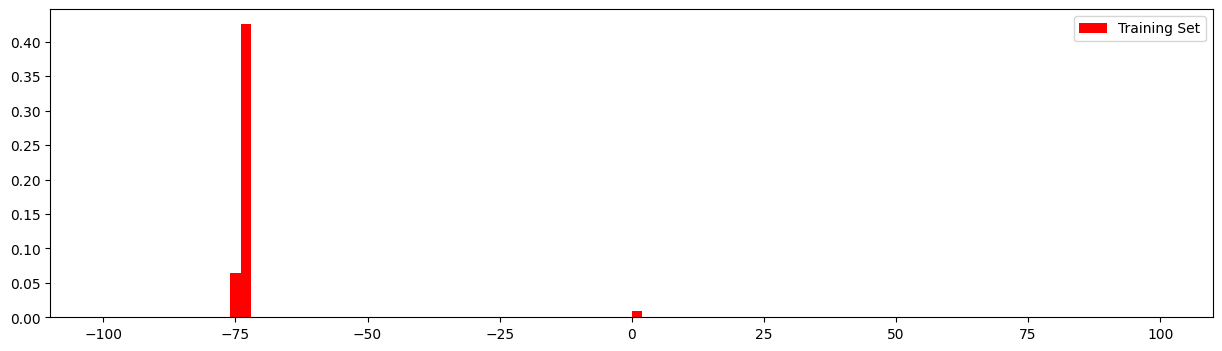

dropoff_latitude


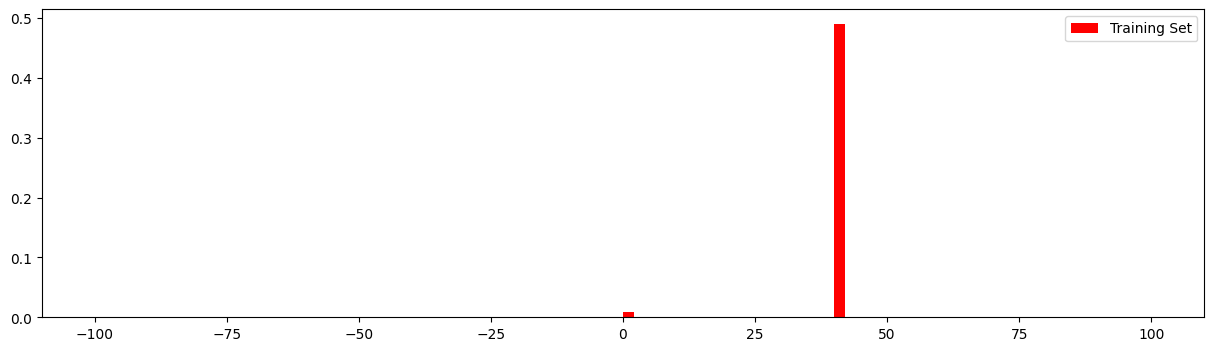

passenger_count


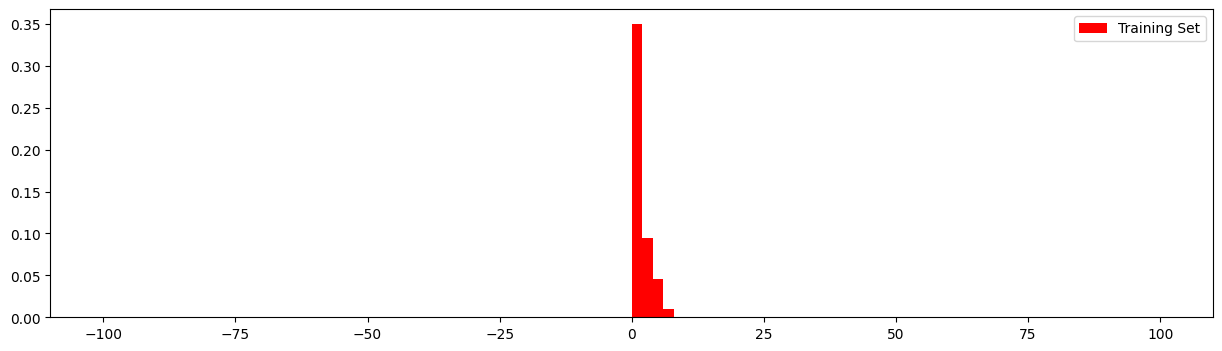

In [21]:
for var in VarNames[2:]:
    print (var)
    plt.figure(figsize=(15,4))
    plt.hist(np.array(train[var]),bins=100,range = (-100,100),color="red",label="Training Set",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Matrix Plot of features

## Histogramming fare prices

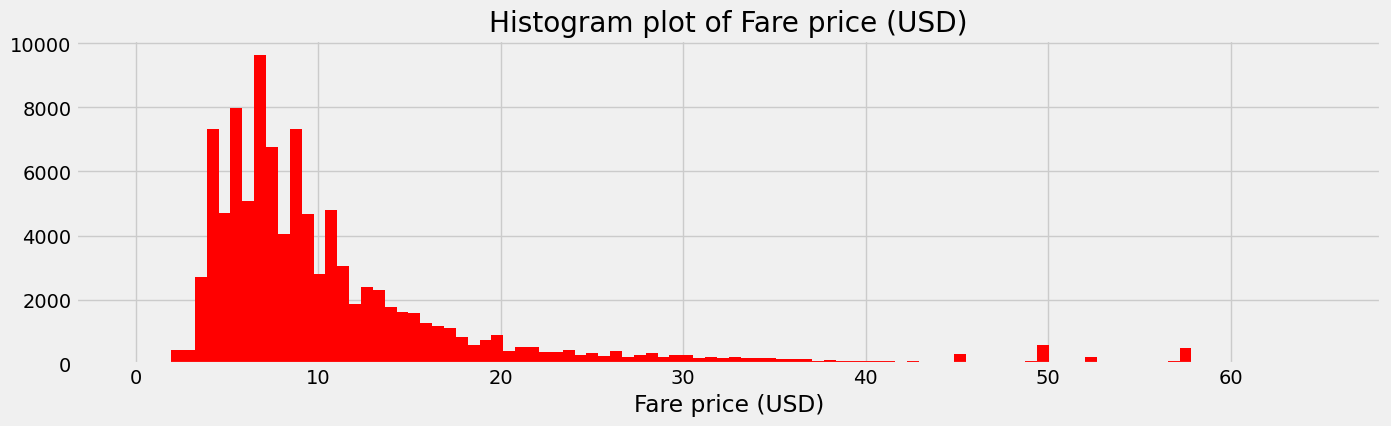

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 4))

plt.hist(train_Y, bins=100,range = (0,65), color='red')
plt.xlabel("Fare price (USD)")
plt.title("Histogram plot of Fare price (USD)")
plt.show()

## Average Lat/Long Distance Differences Scatter Plot

Text(0, 0.5, 'longitude')

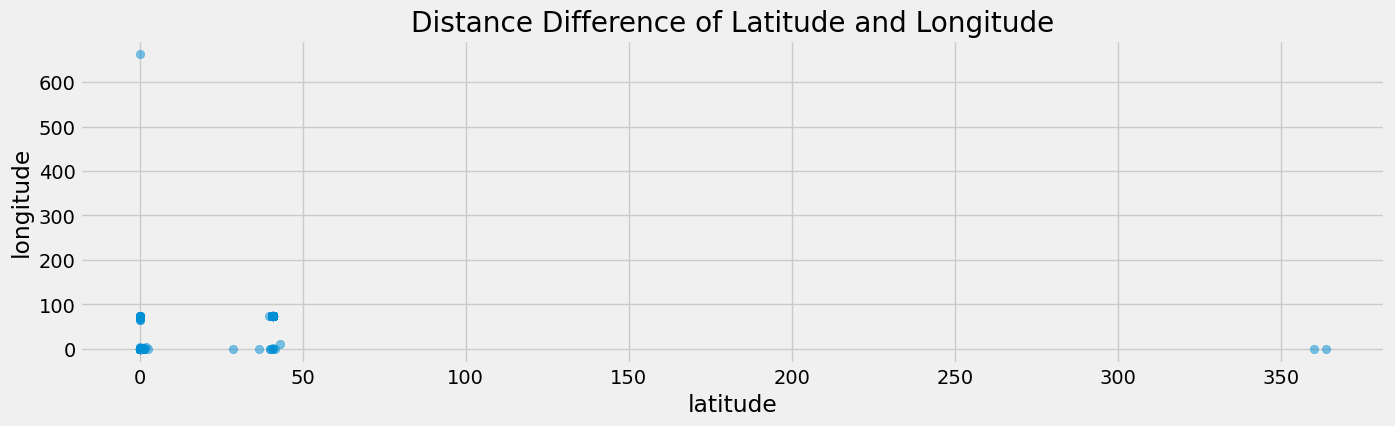

In [24]:
plt.figure(figsize=(15,4))

plt.scatter(train['d_latitude'],train['d_longitude'], alpha=0.5)
plt.title("Distance Difference of Latitude and Longitude")
plt.xlabel("latitude")
plt.ylabel("longitude")

## Passenger Count vs Fare Amount Scatter Plot

Text(0, 0.5, 'fare amount')

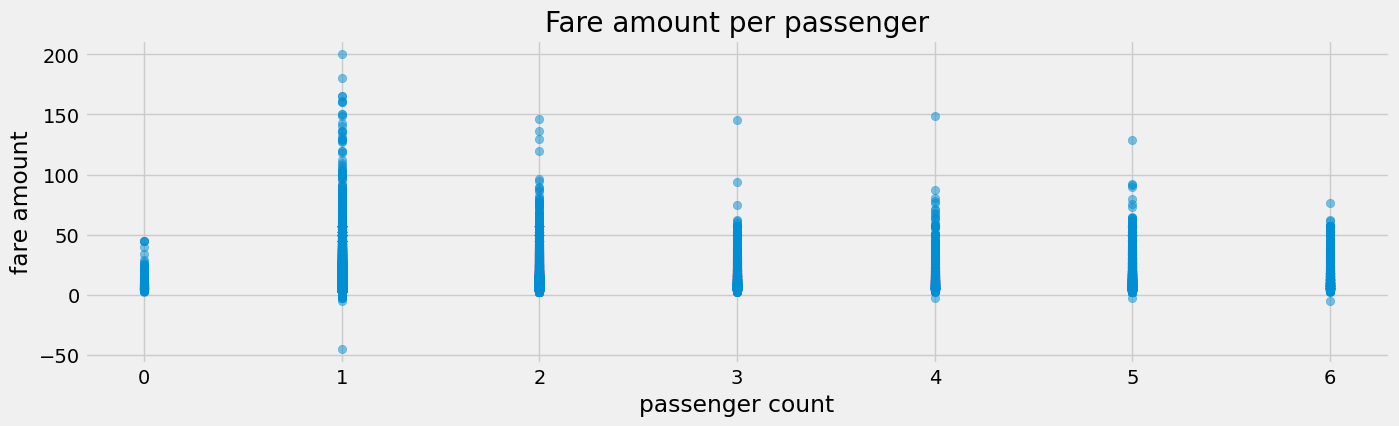

In [35]:
plt.figure(figsize = (15,4))

plt.scatter(train['passenger_count'],train_Y, alpha = 0.5)
plt.title("Fare amount per passenger")
plt.xlabel("passenger count")
plt.ylabel("fare amount")

# Prediction Model (Linear Regression Model)

In [28]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
train_num = train_Y.shape[0]
train_X = df_1[:train_num]
test_X = df_1[train_num:]

reg = GradientBoostingRegressor()
reg.fit(train_X, train_Y)
pred = reg.predict(test_X)

In [39]:
#from sklearn.metrics import mean_squared_error

#mse = mean_squared_error(train_Y, reg.predict(test_X))
#print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [201]:
pred = np.array(pred)
sub = pd.DataFrame({'key': key, 'fare_amount': pred})
sub_int = sub['fare_amount'].astype('int')

# Prediction Showcase

In [202]:
pred

array([ 8.50733627,  8.7326837 ,  4.87610287, ..., 53.5417507 ,
       23.23675455,  6.87611387])

In [203]:
sub.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.507336
1,2015-01-27 13:08:24.0000003,8.732684
2,2011-10-08 11:53:44.0000002,4.876103
3,2012-12-01 21:12:12.0000002,7.779360
4,2012-12-01 21:12:12.0000003,14.767439


In [204]:
sub.describe()

,fare_amount
count,9914.000000
mean,11.466802
std,8.433421
min,4.876103
25%,6.557243
50%,8.779079
75%,12.700407
max,82.493733


## Based on this prediction model above, the average Taxi Fare in NYC should be approximately $11.47

# Taxi Fare Plot

In [1]:
#test_score = np.zeros((sub_int["fare_amount"].head()), dtype=np.float64)
#for i, y_pred in enumerate(reg.staged_predict(X_test)):
 #   test_score[i] = mean_squared_error(y_test, y_pred)
#fig = plt.figure(figsize =(6,6))
#plt.subplot(1, 1, 1)
#plt.title("Deviance")

#training vs test
#plt.plot(np.arange(sub_int["fare_amount"].head() +1, reg.train_score, "b-", label = "Training Deviance"))
#plt.plot(np.arange(sub_int["fare amount"].head() +1, train_score, "r-",label="Test Deviance"))
#plt.legend(loc = "upper right")
#plt.xlabel("Boosting Iterations")
#plt.ylabel("Deviance")
#fig.tight_layout()
#plt.show()

In [208]:
sub.to_csv('submission.csv', index=False) 